# Konstanz Daten

## Kaufkraft

In [ ]:
# svg data: AGS;Stadtteil_Nr;Stadtteil;Jahr ;Quelle;Kaufkraft-Index (pro Einwohner)
# read the csv file "kaufkraft.csv"
# plot Kaufkraft-Index (pro Einwohner) for each Stadtteil over the years
# save the plot as "kaufkraft.png"

import csv
import matplotlib.pyplot as plt

kaufkraft = dict()

# read the csv file "kaufkraft.csv"
with open("Kaufkraftindex_Stadtteile_2011-2022.csv") as f:
    reader = csv.reader(f, delimiter=";")
    header = next(reader)
    for row in reader:
        if row[2] not in kaufkraft:
            kaufkraft[row[2]] = []
        kaufkraft[row[2]].append(row)

# plot Kaufkraft-Index (pro Einwohner) for each Stadtteil over the years
fig, ax = plt.subplots()
for stadtteil, data in kaufkraft.items():
    jahre = [int(row[3]) for row in data]
    kaufkraft_index = [float(row[5].replace(",", ".")) for row in data]
    ax.plot(jahre, kaufkraft_index, label=stadtteil)

# sort the legend alphabetically
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Kaufkraft-Index (pro Einwohner) in den Stadtteilen von Konstanz (2011-2022)")
plt.xlabel("Jahr")
plt.ylabel("Kaufkraft-Index (pro Einwohner)")

# save the plot as "kaufkraft.png" with full legend
plt.savefig("kaufkraft.png", bbox_inches="tight")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Daten laden
einwohner_data = pd.read_csv('Einwohner_nach_Stadtviertel_2010-2023.csv', delimiter=';')
kaufkraft_data = pd.read_csv('Kaufkraftindex_Stadtteile_2011-2022.csv', delimiter=';')

def plot_data(year):
    # Daten vorbereiten
    einwohner_latest = einwohner_data[einwohner_data['Stand_Einwohner'].str.contains(str(year))].copy()
    kaufkraft_latest = kaufkraft_data[kaufkraft_data['Jahr '] == year].copy()

    # Daten aggregieren nach Stadtteil, um die Gesamteinwohnerzahl zu erhalten
    einwohner_agg = einwohner_latest.groupby('STADTTEIL')['EINW_HW_GESAMT'].sum().reset_index()

    # Kaufkraftindex-Daten bereinigen, falls nötig
    kaufkraft_latest['Kaufkraft-Index (pro Einwohner)'] = pd.to_numeric(kaufkraft_latest['Kaufkraft-Index (pro Einwohner)'].str.replace(',', '.'))

    # Daten zusammenführen
    merged_data = pd.merge(einwohner_agg, kaufkraft_latest, left_on='STADTTEIL', right_on='Stadtteil')

    # Korrelation berechnen
    correlation = merged_data['EINW_HW_GESAMT'].corr(merged_data['Kaufkraft-Index (pro Einwohner)'])

    # Plot
    plt.figure(figsize=(10, 6))
    sns.regplot(data=merged_data, x='EINW_HW_GESAMT', y='Kaufkraft-Index (pro Einwohner)', scatter_kws={'s':50}, line_kws={"color": "red"})
    plt.title(f'Korrelation zwischen Einwohnerzahl und Kaufkraftindex für das Jahr {year}: {correlation:.2f}')
    plt.xlabel('Einwohnerzahl')
    plt.ylabel('Kaufkraftindex pro Einwohner')
    plt.grid(True)
    plt.show()

# Erstellung des Dropdown-Menüs
year_dropdown = widgets.Dropdown(
    options=[(str(year), year) for year in range(2011, 2023)],
    value=2022,
    description='Jahr:',
)

# Interaktive Widget-Anzeige
widgets.interactive(plot_data, year=year_dropdown)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden
data = pd.read_csv('Stadtteile_Konstanz_2011-2022.csv', decimal=',')

# Umwandlung der relevanten Spalten in numerische Werte
cols_to_convert = ['Wohnbev_insg', 'Nichtdeutsch', 'EINW_HW_GESAMT'] + [
    'EINW_HW_unter18', 'EINW_HW_18_bis_unter_30', 'EINW_HW_30_bis_unter_40',
    'EINW_HW_40_bis_unter_50', 'EINW_HW_50_bis_unter_60', 'EINW_HW_60_und_aelter'
]
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Berechnung des Anteils der nichtdeutschen Bevölkerung
data['Nichtdeutsch_Anteil'] = data['Nichtdeutsch'] / data['Wohnbev_insg'] * 100

# Sicherstellung, dass alle Berechnungen korrekt durchgeführt werden
data.dropna(inplace=True)  # Entfernen aller Zeilen mit NaN-Werten, um Fehler zu vermeiden

# Berechnung des Durchschnittsalters
altersgruppen = ['EINW_HW_unter18', 'EINW_HW_18_bis_unter_30', 'EINW_HW_30_bis_unter_40',
                 'EINW_HW_40_bis_unter_50', 'EINW_HW_50_bis_unter_60', 'EINW_HW_60_und_aelter']
mittelpunkte = [9, 24, 35, 45, 55, 70]

data['Durchschnittsalter'] = sum(data[alt] * mp for alt, mp in zip(altersgruppen, mittelpunkte)) / data['EINW_HW_GESAMT']

# Korrelation berechnen und ausgeben
print("Spearman-Korrelationskoeffizienten:")
print(data[['Kaufkraft-Index (pro Einwohner)', 'Nichtdeutsch_Anteil', 'Durchschnittsalter']].corr(method='spearman'))

# Plots erstellen
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Nichtdeutsch_Anteil', y='Kaufkraft-Index (pro Einwohner)', data=data)
plt.title('Kaufkraft vs. Anteil nichtdeutscher Bevölkerung')
plt.xlabel('Anteil nichtdeutscher Bevölkerung (%)')
plt.ylabel('Kaufkraft-Index (pro Einwohner)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Durchschnittsalter', y='Kaufkraft-Index (pro Einwohner)', data=data)
plt.title('Kaufkraft vs. Durchschnittsalter')
plt.xlabel('Durchschnittsalter')
plt.ylabel('Kaufkraft-Index (pro Einwohner)')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
file_path = 'Stadtteile_Konstanz_2011-2022.csv'
data = pd.read_csv(file_path)

# Kaufkraft-Index aus dem deutschen Format in ein numerisches Format umwandeln (Kommas zu Punkten)
data['Kaufkraft-Index (pro Einwohner)'] = data['Kaufkraft-Index (pro Einwohner)'].str.replace(',', '.').astype(float)

# Stichtag in ein Datumsformat konvertieren
data['Stichtag'] = pd.to_datetime(data['Stichtag'], format='%Y')

# Gruppierung der Daten nach Stadtteil und Stichtag und Mittelwert der Kaufkraft berechnen
grouped_data = data.groupby(['Stadtteil', 'Stichtag'])['Kaufkraft-Index (pro Einwohner)'].mean().unstack()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.T.plot(ax=ax)
ax.set_title('Zeitreihenanalyse der Kaufkraft-Indizes in Konstanz Stadtteilen')
ax.set_ylabel('Kaufkraft-Index (pro Einwohner)')
ax.set_xlabel('Jahr')
plt.legend(title='Stadtteil')
plt.grid(True)
plt.show()


## Alter

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Stadtteile_Konstanz_2011-2022.csv', sep=',')

# Filter the data for Stichtag = 2022
df_2022 = df[df['Stichtag'] == 2022]

# Calculate the weighted average age for each Stadtteil
weighted_avg_age = {}
for stadtteil in df_2022['Stadtteil'].unique():
    stadtteil_data = df_2022[df_2022['Stadtteil'] == stadtteil]
    total_population = stadtteil_data['EINW_HW_GESAMT'].sum()
    
    age_groups = ['EINW_HW_unter18', 'EINW_HW_18_bis_unter_30', 'EINW_HW_30_bis_unter_40',
                  'EINW_HW_40_bis_unter_50', 'EINW_HW_50_bis_unter_60', 'EINW_HW_60_und_aelter']
    midpoint_ages = [9, 24, 35, 45, 55, 70]
    
    weighted_sum = 0
    for age_group in age_groups:
        population_in_group = stadtteil_data[age_group].sum()
        midpoint_age = midpoint_ages[age_groups.index(age_group)]
        weighted_sum += population_in_group * midpoint_age
    
    #print(f"Stadtteil: {stadtteil}, weighted average age: {weighted_sum / total_population}, total population: {total_population}")
    weighted_avg_age[stadtteil] = weighted_sum / total_population

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(list(weighted_avg_age.keys()), list(weighted_avg_age.values()))
plt.xlabel('Stadtteil')
plt.ylabel('Weighted Average Age')
plt.title('Weighted Average Age by Stadtteil (Jahr 2021)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact

einwohner_data = pd.read_csv('Einwohner_nach_Stadtviertel_2010-2023.csv', delimiter=';')
einwohner_data['Stand_Einwohner'] = pd.to_datetime(einwohner_data['Stand_Einwohner'], format='%d.%m.%Y', errors='coerce')

age_columns = ['EINW_HW_unter18', 'EINW_HW_18_bis_unter_30', 'EINW_HW_30_bis_unter_40', 'EINW_HW_40_bis_unter_50', 'EINW_HW_50_bis_unter_60', 'EINW_HW_60_und_aelter']
melted_data = einwohner_data.melt(id_vars=['STADTTEIL'], value_vars=age_columns, var_name='Age_Group', value_name='Population')

def plot_age_distribution(stadtteil):
    data = melted_data[melted_data['STADTTEIL'] == stadtteil]
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x='Age_Group', y='Population', hue='Age_Group', palette='viridis', legend=False, errorbar=None)
    plt.title(f'Altersverteilung in {stadtteil}')
    plt.ylabel('Anzahl der Einwohner')
    plt.xlabel('Altersgruppe')
    plt.xticks(rotation=45)
    plt.show()

# Dropdown für die Auswahl des Stadtteils
interact(plot_age_distribution, stadtteil=sorted(einwohner_data['STADTTEIL'].unique()))



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact

einwohner_data = pd.read_csv('Einwohner_nach_Stadtviertel_2010-2023.csv', delimiter=';')
einwohner_data['Stand_Einwohner'] = pd.to_datetime(einwohner_data['Stand_Einwohner'], format='%d.%m.%Y', errors='coerce')

age_groups = {
    'EINW_HW_unter18': 9,
    'EINW_HW_18_bis_unter_30': 24,
    'EINW_HW_30_bis_unter_40': 35,
    'EINW_HW_40_bis_unter_50': 45,
    'EINW_HW_50_bis_unter_60': 55,
    'EINW_HW_60_und_aelter': 70
}

def plot_age_distribution(year):
    filtered_data = einwohner_data[einwohner_data['Stand_Einwohner'].dt.year == year]
    age_distribution = pd.DataFrame()
    
    for column, age in age_groups.items():
        temp = filtered_data[['STADTTEIL', column]].copy()
        temp['Age'] = age
        temp['Count'] = temp[column].fillna(0).astype(int)
        temp = temp[temp['Count'] > 0]
        temp = temp.loc[temp.index.repeat(temp['Count'])]
        temp['Age'] = age
        age_distribution = pd.concat([age_distribution, temp], ignore_index=True)
    
    age_distribution.drop(columns=['Count'], inplace=True)
    
    plt.figure(figsize=(12, 8))
    sns.violinplot(data=age_distribution, x='STADTTEIL', y='Age', hue='STADTTEIL', palette='viridis')
    plt.title(f'Altersverteilung über Stadtteile in Konstanz für das Jahr {year}')
    plt.xlabel('Stadtteil')
    plt.ylabel('Alter')
    plt.xticks(rotation=45)
    plt.show()

years = sorted(einwohner_data['Stand_Einwohner'].dt.year.unique())
interact(plot_age_distribution, year=years)


## Demographie

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import ipywidgets as widgets
from IPython.display import clear_output

# Daten laden
data = pd.read_csv('Geburten_und_Sterbefälle_Stadtteile_2011-2023.csv', delimiter=';')

# Datenbereinigung
data.columns = data.columns.str.strip()

# Dropdown-Menu zur Auswahl des Stadtteils erstellen
stadtteile = data['Stadtteil_Name'].unique()
options = ['Gesamte Stadt'] + list(stadtteile)
dropdown = widgets.Dropdown(options=options, description='Stadtteil:', value='Gesamte Stadt')

def update_plot(change):
    clear_output(wait=True)
    display(dropdown)
    
    if change.new == 'Gesamte Stadt':
        # Summieren der Daten für die gesamte Stadt
        stadtteil_data = data.groupby('Jahr').agg({'Lebendgeburten': 'sum', 'Sterbefaelle': 'sum'}).reset_index()
    else:
        stadtteil_data = data[data['Stadtteil_Name'] == change.new].copy()

    stadtteil_data['Jahr_numerisch'] = pd.to_numeric(stadtteil_data['Jahr'])
    X = stadtteil_data['Jahr_numerisch'].values.reshape(-1, 1)
    y = stadtteil_data['Lebendgeburten'].values

    model = LinearRegression()
    model.fit(X, y)
    stadtteil_data['Vorhersage_Lebendgeburten'] = model.predict(X)

    # Ergebnisse plotten
    plt.figure(figsize=(10, 6))
    plt.scatter(stadtteil_data['Jahr'], stadtteil_data['Lebendgeburten'], color='blue', label='Tatsächliche Lebendgeburten')
    plt.plot(stadtteil_data['Jahr'], stadtteil_data['Vorhersage_Lebendgeburten'], color='red', label='Vorhersage der Lebendgeburten')
    plt.xlabel('Jahr')
    plt.ylabel('Lebendgeburten')
    plt.title(f'Trend der Lebendgeburtenrate in {change.new}')
    plt.legend()
    plt.show()


# Beobachter zum Dropdown hinzufügen
dropdown.observe(update_plot, names='value')

# Dropdown anzeigen
display(dropdown)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, interact

# Daten laden
data_path = 'Stadtteile_Konstanz_2011-2022.csv'  # Pfad zur CSV-Datei anpassen
data = pd.read_csv(data_path)

# Stadtteile extrahieren und Option "Konstanz" hinzufügen
stadtteile = data['Stadtteil'].unique().tolist()
stadtteile_options = ['Konstanz'] + stadtteile

# Funktion zur Darstellung der demografischen Entwicklung
def plot_demographic_development(stadtteil):
    plt.figure(figsize=(10, 6))
    
    if stadtteil == 'Konstanz':
        # Daten für alle Stadtteile aggregieren
        grouped_data = data.groupby('Stichtag').sum()
    else:
        # Daten für einen spezifischen Stadtteil filtern
        grouped_data = data[data['Stadtteil'] == stadtteil].groupby('Stichtag').sum()
    
    # Linienplot erstellen
    plt.plot(grouped_data.index, grouped_data['Wohnbev_insg'], label='Gesamteinwohnerzahl')
    plt.plot(grouped_data.index, grouped_data['Deutsch'], label='Deutsche Einwohner')
    plt.plot(grouped_data.index, grouped_data['Nichtdeutsch'], label='Nicht-deutsche Einwohner')
    
    # Titel und Beschriftungen hinzufügen
    plt.title(f'Demografische Entwicklung in {stadtteil}')
    plt.xlabel('Jahr')
    plt.ylabel('Einwohnerzahl')
    plt.legend()
    
    # Dynamische Skalierung der Y-Achse
    y_max = grouped_data[['Wohnbev_insg', 'Deutsch', 'Nichtdeutsch']].max().max()
    y_min = grouped_data[['Wohnbev_insg', 'Deutsch', 'Nichtdeutsch']].min().min()
    plt.ylim(y_min - (y_max - y_min) * 0.1, y_max + (y_max - y_min) * 0.1)
    
    plt.grid(True)
    plt.show()

# Interaktives Widget
dropdown = Dropdown(options=stadtteile_options, value='Konstanz', description='Stadtteil:')
interact(plot_demographic_development, stadtteil=dropdown)


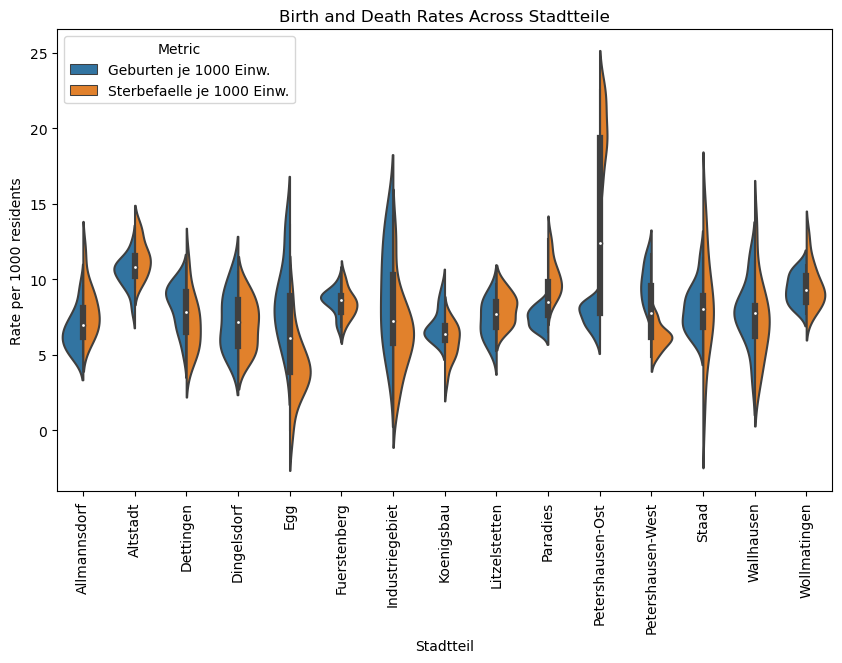

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Stadtteile_Konstanz_2011-2022.csv')

# Convert the rate columns to numeric
df['Geburten je 1000 Einw.'] = df['Geburten je 1000 Einw.'].str.replace(',', '.').astype(float)
df['Sterbefaelle je 1000 Einw.'] = df['Sterbefaelle je 1000 Einw.'].str.replace(',', '.').astype(float)

# Melt the data to have a single 'variable' column
df_melted = pd.melt(df, id_vars=['Stadtteil'], value_vars=['Geburten je 1000 Einw.', 'Sterbefaelle je 1000 Einw.'], var_name='Metric', value_name='Rate')

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Stadtteil', y='Rate', hue='Metric', data=df_melted, split=True, palette=['#1f77b4', '#ff7f0e'])

# Add labels and title
plt.xlabel('Stadtteil')
plt.ylabel('Rate per 1000 residents')
plt.title('Birth and Death Rates Across Stadtteile')
plt.legend(title='Metric', loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


## Family state

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Einwohner_Familienstand_Konstanz_2010-2023.csv', sep=';')

# Convert the 'Stichtag' column to datetime
df['Stichtag'] = pd.to_datetime(df['Stichtag'])

# Extract the year from the 'Stichtag' column
df['Year'] = df['Stichtag'].dt.year

# Group the data by year and sum the family states
family_states = ['Fam_Stand_ledig (ab 18J)', 'Fam_Stand_Verheiratet_Lebenspartnerschaft (ab 18J)',
                 'Fam_Stand_Verwitwet_LP-gestorben (ab 18J)', 'Fam_Stand_Geschieden_LP aufgehoben (ab 18J)',
                 'Fam_Stand_unbekannt (ab 18J)']
grouped_data = df.groupby('Year')[family_states].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
for col in family_states:
    plt.plot(grouped_data['Year'], grouped_data[col], label=col)
plt.xlabel('Year')
plt.ylabel('Total Number')
plt.title('Family States Over Time')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Stadtteile_Konstanz_2011-2022.csv')

# Filter the data to only include the 2022 Stichtag
df = df[df['Stichtag'] == 2022]

# Group the data by Stadtteil and calculate the family status counts
family_status_cols = [
    'Fam_Stand_ledig (ab 18J)',
    'Fam_Stand_Verheiratet_Lebenspartnerschaft (ab 18J)',
    'Fam_Stand_Verwitwet_LP-gestorben (ab 18J)',
    'Fam_Stand_Geschieden_LP aufgehoben (ab 18J)',
    'Fam_Stand_unbekannt (ab 18J)'
]
family_status_counts = df.groupby('Stadtteil')[family_status_cols].sum()

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
family_status_counts.plot(kind='bar', ax=ax)

## Header
ax.set_title('Family Status by Stadtteil (2022)')
ax.set_xlabel('Stadtteil')
ax.set_ylabel('Count')

## Formatting
ax.legend(title='Family Status')
ax.set_xticklabels(family_status_counts.index, rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Stadtteile_Konstanz_2011-2022.csv')
# Filter the data to only include the 2022 Stichtag
df = df[df['Stichtag'] == 2022]

# Group the data by Stadtteil and calculate the family status counts
family_status_cols = [
    'Fam_Stand_ledig (ab 18J)',
    'Fam_Stand_Verheiratet_Lebenspartnerschaft (ab 18J)',
    'Fam_Stand_Geschieden_LP aufgehoben (ab 18J)',
    'Fam_Stand_Verwitwet_LP-gestorben (ab 18J)',
    'Fam_Stand_unbekannt (ab 18J)'
]
family_status_counts = df.groupby('Stadtteil')[family_status_cols].sum()

# Create the stacked bar plot with inverted order
fig, ax = plt.subplots(figsize=(12, 8))
family_status_counts[family_status_cols[::-1]].plot(kind='bar', stacked=True, ax=ax)

## Header
ax.set_title('Family Status by Stadtteil')
ax.set_xlabel('Stadtteil')
ax.set_ylabel('Count')

## Formatting
ax.legend(title='Family Status', loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xticklabels(family_status_counts.index, rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Stadtteile_Konstanz_2011-2022.csv')
# Filter the data to only include the 2022 Stichtag
df = df[df['Stichtag'] == 2022]

# Group the data by Stadtteil and calculate the family status counts
family_status_cols = [
    'Fam_Stand_ledig (ab 18J)',
    'Fam_Stand_Verheiratet_Lebenspartnerschaft (ab 18J)',
    'Fam_Stand_Geschieden_LP aufgehoben (ab 18J)',
    'Fam_Stand_Verwitwet_LP-gestorben (ab 18J)',
    'Fam_Stand_unbekannt (ab 18J)'
]
family_status_counts = df.groupby('Stadtteil')[family_status_cols].sum()

# Calculate the percentage of each family status for each Stadtteil
family_status_percentages = family_status_counts.div(family_status_counts.sum(axis=1), axis=0) * 100

# Create the line plot
fig, ax = plt.subplots(figsize=(12, 8))
family_status_percentages.plot(kind='line', ax=ax)

## Header
ax.set_title('Family Status Percentage by Stadtteil')
ax.set_xlabel('Stadtteil')
ax.set_ylabel('Percentage (%)')

## Formatting
ax.legend(title='Family Status', loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xticks(range(len(family_status_percentages.index)))
ax.set_xticklabels(family_status_percentages.index, rotation=90)
ax.grid(True)  # Add grid
plt.tight_layout()
plt.show()


## Religion

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Stadtteile_Konstanz_2011-2022.csv')

# Filter the data to only include the 2022 Stichtag
df = df[df['Stichtag'] == 2022]

# Calculate the percentage of each religion for each stadtteil
df['Religion - katholisch %'] = (df['Religion - katholisch'] / df['Wohnbev_insg']) * 100
df['Religion - evangelisch %'] = (df['Religion - evangelisch'] / df['Wohnbev_insg']) * 100
df['Christlich insgesamt %'] = df['Religion - katholisch %'] + df['Religion - evangelisch %']

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the bar plot
df.plot(x='Stadtteil', y=['Religion - katholisch %', 'Religion - evangelisch %'], kind='bar', ax=ax)

# Plot the line plot
df.plot(x='Stadtteil', y='Christlich insgesamt %', kind='line', color='black', marker='o', ax=ax)

# Set the title and axis labels
ax.set_title('Religionszugehörigkeit in den Stadtteilen von Konstanz (2022)')
ax.set_xlabel('Stadtteil')
ax.set_ylabel('Anteil in %')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Stadtteile_Konstanz_2011-2022.csv')

# Filter the data to only include the 2022 Stichtag
df = df[df['Stichtag'] == 2022]

# Calculate the percentage of each religion for each stadtteil
df['Religion - katholisch %'] = (df['Religion - katholisch'] / df['Wohnbev_insg']) * 100
df['Religion - evangelisch %'] = (df['Religion - evangelisch'] / df['Wohnbev_insg']) * 100
df['Christlich insgesamt %'] = df['Religion - katholisch %'] + df['Religion - evangelisch %']
df['Einwohner nicht-deutsch %'] = (df['EINW_HW_NICHTDEUTSCH'] / df['Wohnbev_insg']) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plot the line plots
df.plot(x='Stadtteil', y=['Christlich insgesamt %', 'Einwohner nicht-deutsch %'], kind='line', ax=ax)

# Set the title and axis labels
ax.set_title('Gesamtanteil der Religionszugehörigkeit und Anteil der Nichtdeutschen in den Stadtteilen von Konstanz (2022)')
ax.set_xlabel('Stadtteil')
ax.set_ylabel('Anteil in %')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend
ax.legend()

# Get the unique stadtteil names
stadtteil_names = df['Stadtteil'].unique()

# Adjust the x-axis tick labels to show the full stadtteil names
ax.set_xticks(range(len(stadtteil_names)))
ax.set_xticklabels(stadtteil_names, rotation=90)

# Adjust the figure size to fit the x-axis labels
fig.set_size_inches(16, 10)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Stadtteile_Konstanz_2011-2022.csv')

# Filter the data to only include the 2022 Stichtag
df = df[df['Stichtag'] == 2022]

# Calculate the percentage of each religion for each stadtteil
df['Religion - katholisch %'] = (df['Religion - katholisch'] / df['Wohnbev_insg']) * 100
df['Religion - evangelisch %'] = (df['Religion - evangelisch'] / df['Wohnbev_insg']) * 100
df['Christlich insgesamt %'] = df['Religion - katholisch %'] + df['Religion - evangelisch %']
df['Verheiratet %'] = (df['Fam_Stand_Verheiratet_Lebenspartnerschaft (ab 18J)'] / df['Wohnbev_insg']) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plot the line plots
df.plot(x='Stadtteil', y=['Christlich insgesamt %', 'Verheiratet %'], kind='line', ax=ax)

# Set the title and axis labels
ax.set_title('Gesamtanteil der Religionszugehörigkeit und Anteil der Verheirateten in den Stadtteilen von Konstanz (2022)')
ax.set_xlabel('Stadtteil')
ax.set_ylabel('Anteil in %')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend
ax.legend()

# Get the unique stadtteil names
stadtteil_names = df['Stadtteil'].unique()

# Adjust the x-axis tick labels to show the full stadtteil names
ax.set_xticks(range(len(stadtteil_names)))
ax.set_xticklabels(stadtteil_names, rotation=90)

# Adjust the figure size to fit the x-axis labels
fig.set_size_inches(16, 10)

# Show the plot
plt.show()
